# Examen de cinturón AML: Opción A

Descripción del examen:

En este examen, trabajarás con un dataset reciente de complejidad baja, donde primero realizarás un análisis no supervisado utilizando K-means o PCA, y luego modelarás el conjunto de datos utilizando un Perceptrón Multicapa (MLP). El objetivo es aplicar técnicas de clustering o reducción de dimensionalidad para analizar los datos, seguido de la implementación de un modelo MLP para realizar predicciones.

Dataset:

El dataset utilizado para este examen es el “Customer Personality Analysis” disponible en Kaggle. Este conjunto de datos contiene información demográfica y de comportamiento de clientes, con el objetivo de agruparlos y predecir sus patrones de compra.

Enlace al dataset: https://www.kaggle.com/imakash3011/customer-personality-analysis

Content
Attributes

People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

- bPromotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

Target

Need to perform clustering to summarize customer segments.

# 1. Exploración y preprocesamiento de datos:
  – Carga y explora el dataset para identificar las variables más relevantes. Las características incluyen información demográfica como la edad, el ingreso, el estado civil, y datos de comportamiento de compra, como la cantidad gastada en diferentes productos.
  
  – Asegúrate de manejar los valores nulos y realizar un preprocesamiento adecuado, como la normalización de los datos para el análisis posterior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/1_marketing_campaign.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [2]:
# Verificando si hay datos nulos (%)
print("Valores nulos:")
print((df.isnull().sum() * 100 / len(df)).round(2))
print("\n")

# Verificando si hay duplicados
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

Valores nulos:
ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64


Valores duplicados:
0




In [3]:
# Detectar outliers en variables numéricas
def outliers_IQR(df):
    # Filtrar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['number']).columns

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)  # Primer cuartil
        Q3 = df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1               # Rango intercuartílico

        # Definir los límites inferior y superior de los valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\n🚩 Outliers detected in {col}: {outliers.shape[0]}")

        # Opcional: Remover outliers
        # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Llamar a la función
outliers_IQR(df)


🚩 Outliers detected in ID: 0

🚩 Outliers detected in Year_Birth: 3

🚩 Outliers detected in Income: 8

🚩 Outliers detected in Kidhome: 0

🚩 Outliers detected in Teenhome: 0

🚩 Outliers detected in Recency: 0

🚩 Outliers detected in MntWines: 35

🚩 Outliers detected in MntFruits: 227

🚩 Outliers detected in MntMeatProducts: 175

🚩 Outliers detected in MntFishProducts: 223

🚩 Outliers detected in MntSweetProducts: 248

🚩 Outliers detected in MntGoldProds: 207

🚩 Outliers detected in NumDealsPurchases: 86

🚩 Outliers detected in NumWebPurchases: 4

🚩 Outliers detected in NumCatalogPurchases: 23

🚩 Outliers detected in NumStorePurchases: 0

🚩 Outliers detected in NumWebVisitsMonth: 8

🚩 Outliers detected in AcceptedCmp3: 163

🚩 Outliers detected in AcceptedCmp4: 167

🚩 Outliers detected in AcceptedCmp5: 163

🚩 Outliers detected in AcceptedCmp1: 144

🚩 Outliers detected in AcceptedCmp2: 30

🚩 Outliers detected in Complain: 21

🚩 Outliers detected in Z_CostContact: 0

🚩 Outliers detected in 

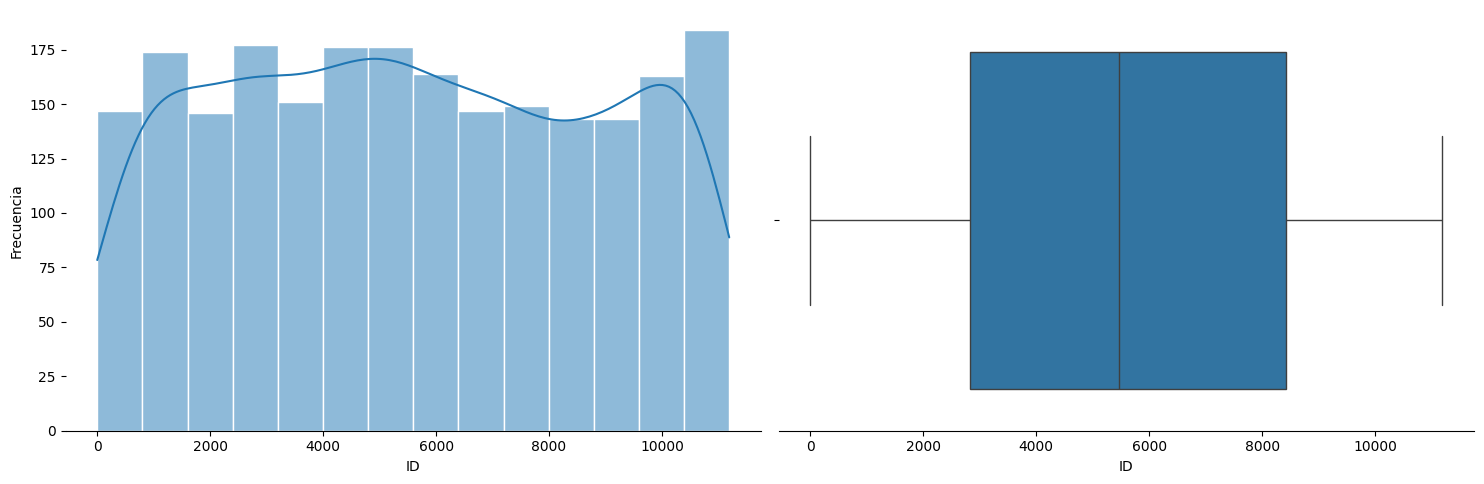

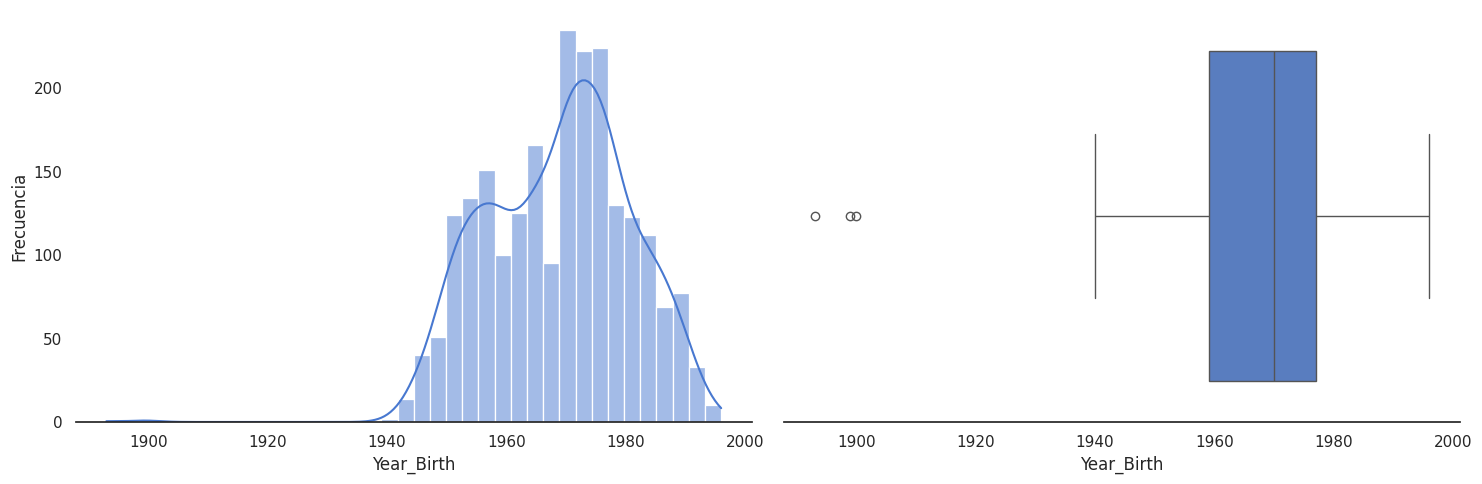

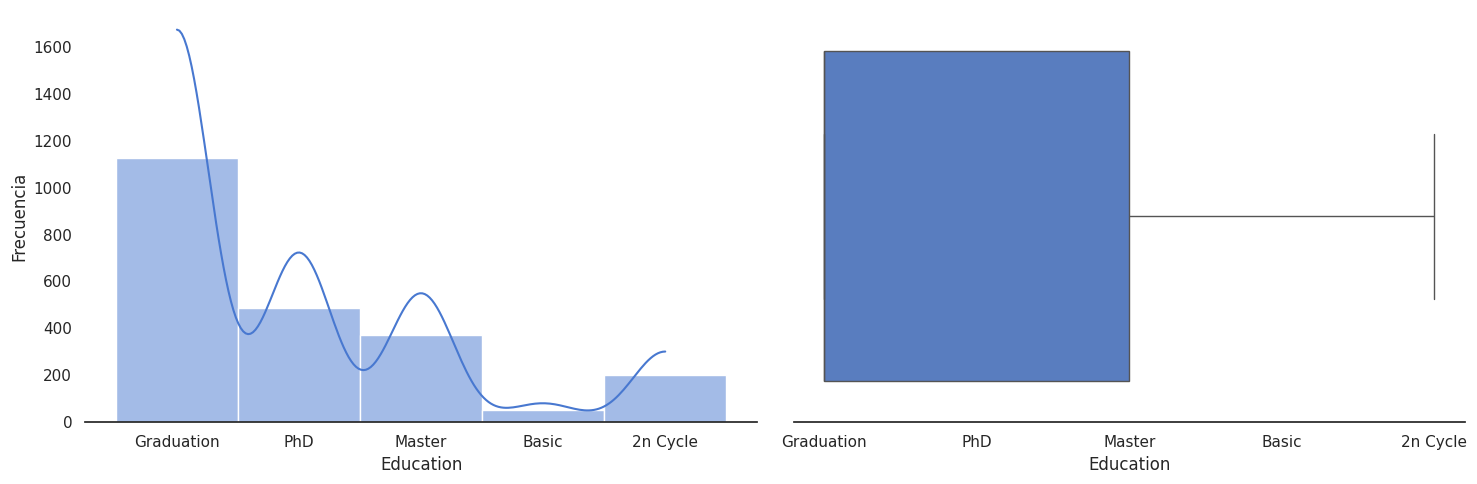

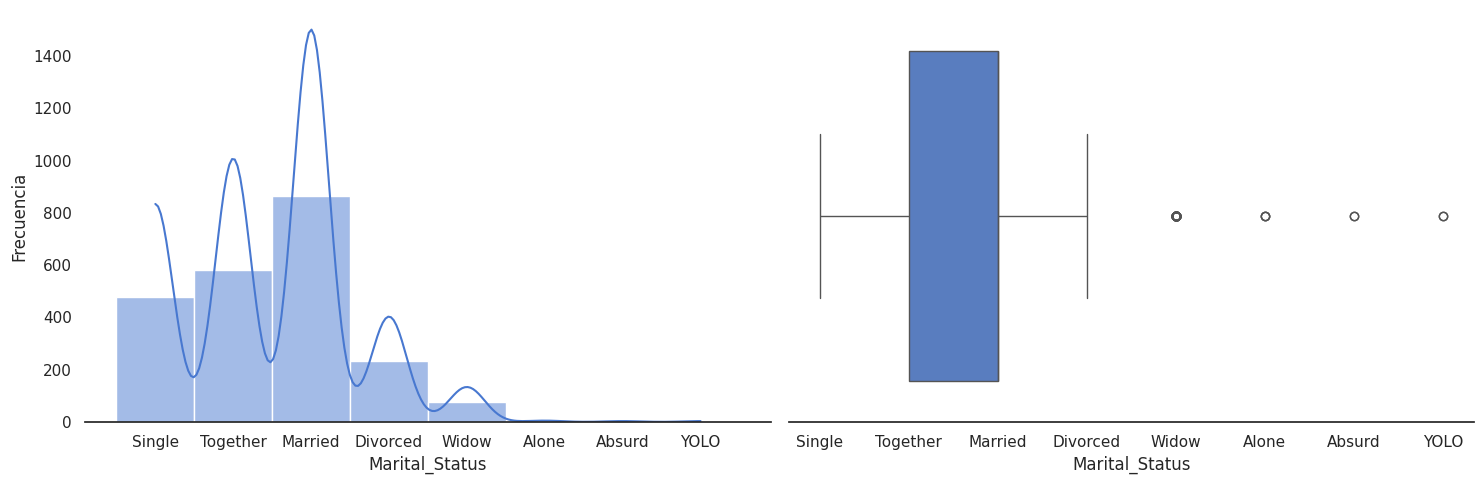

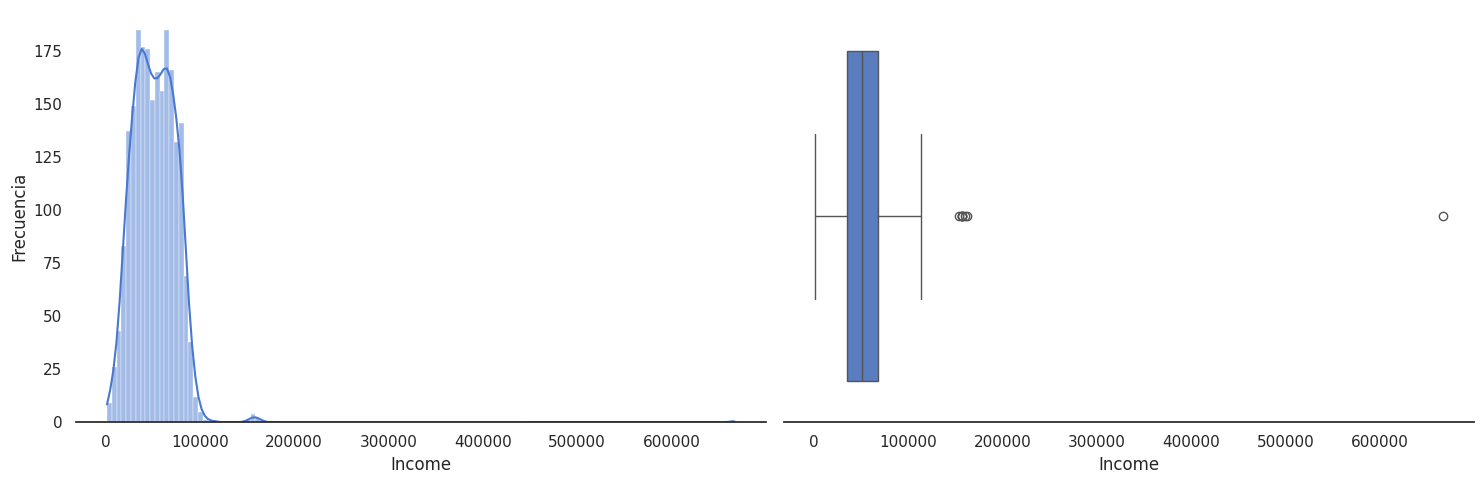

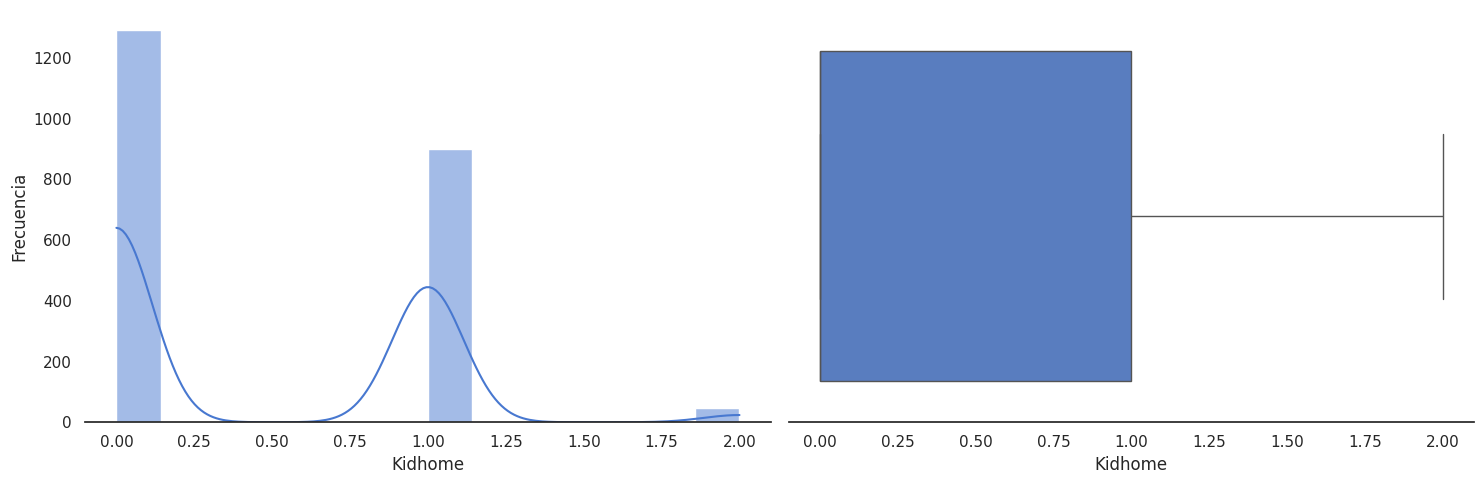

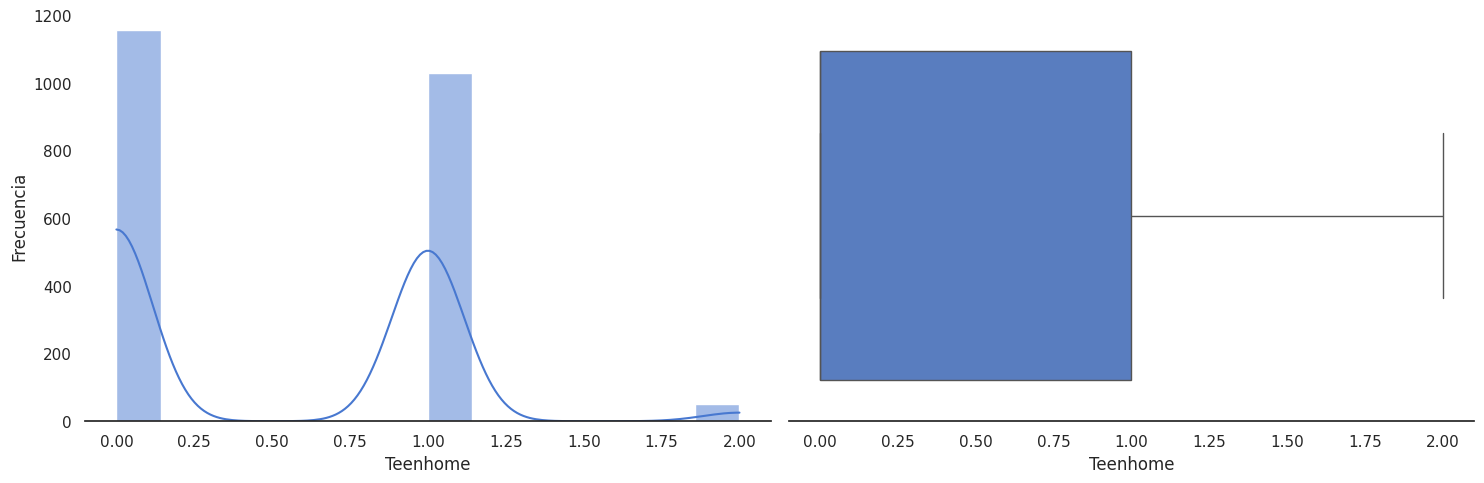

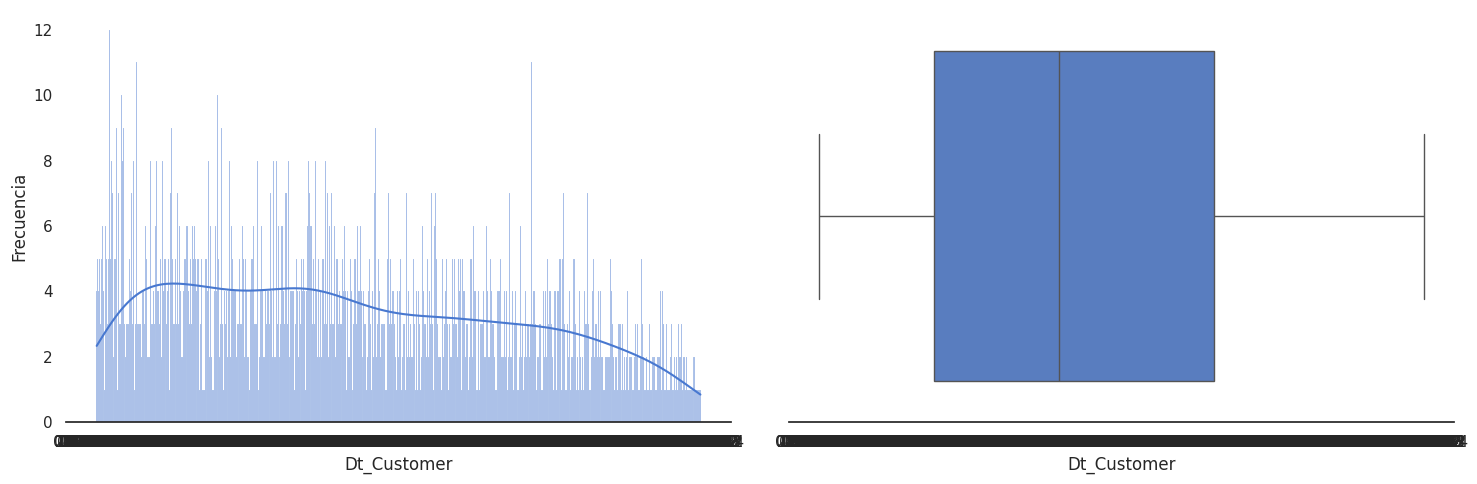

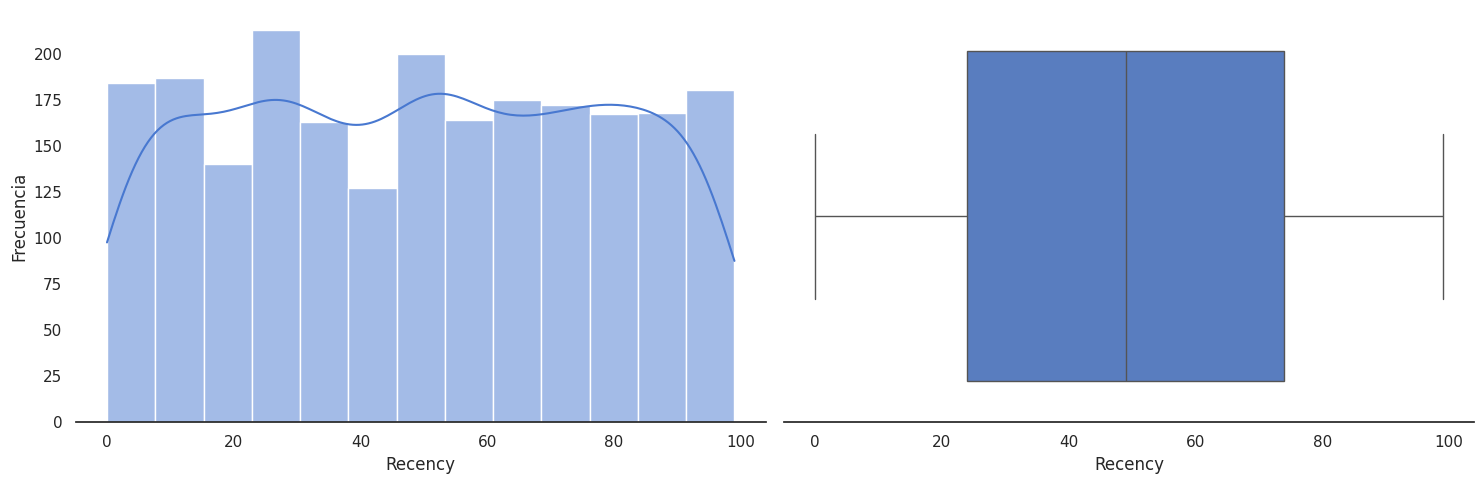

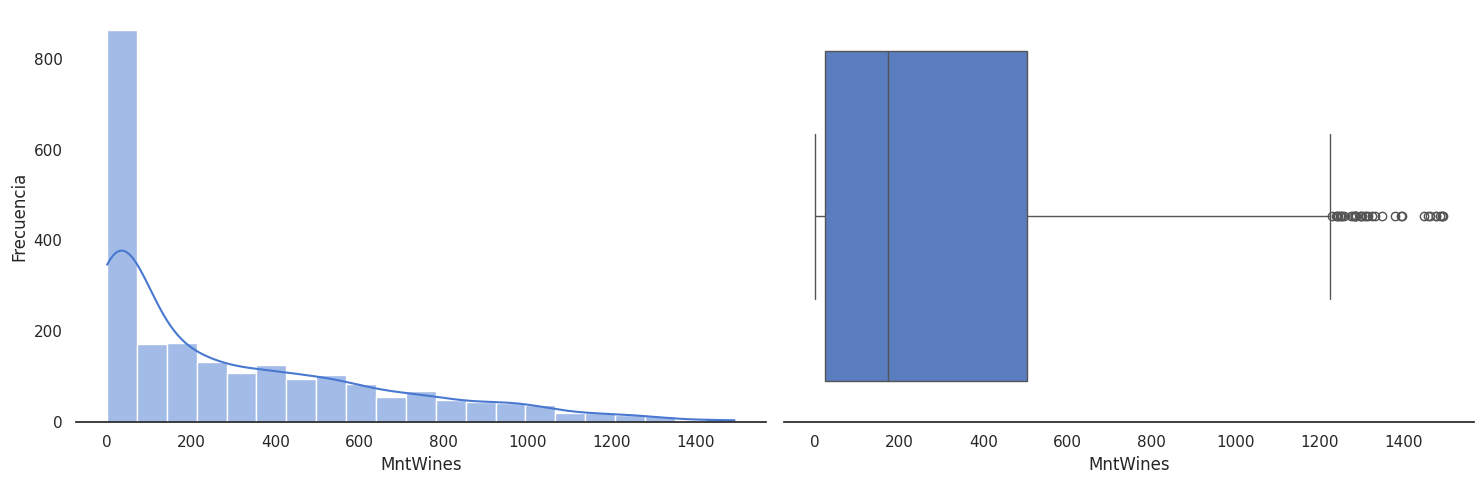

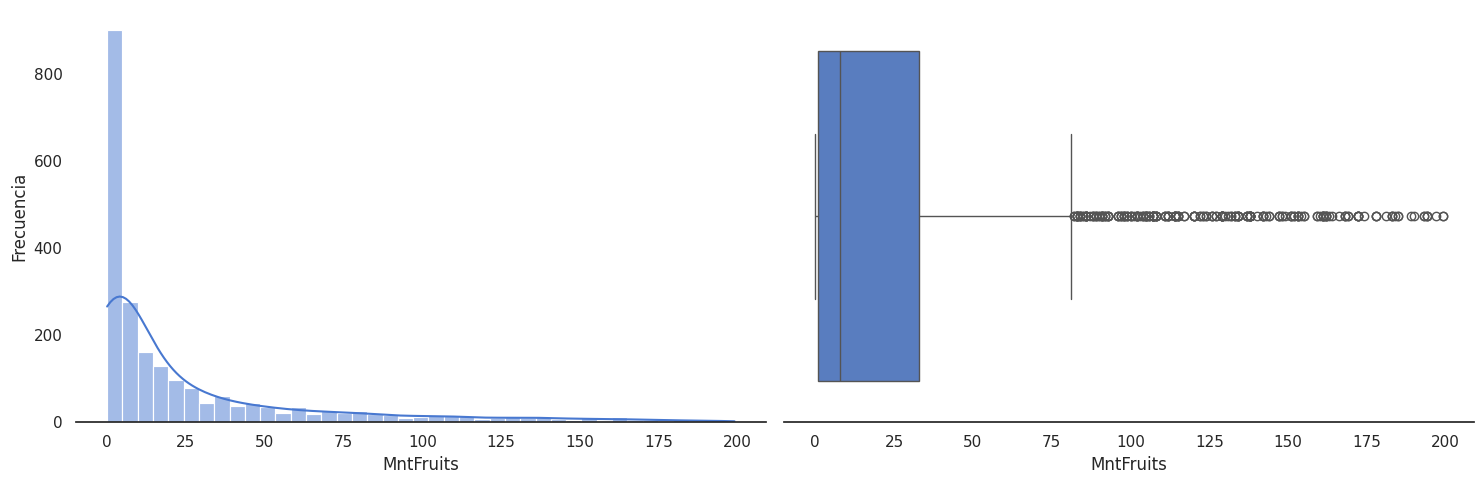

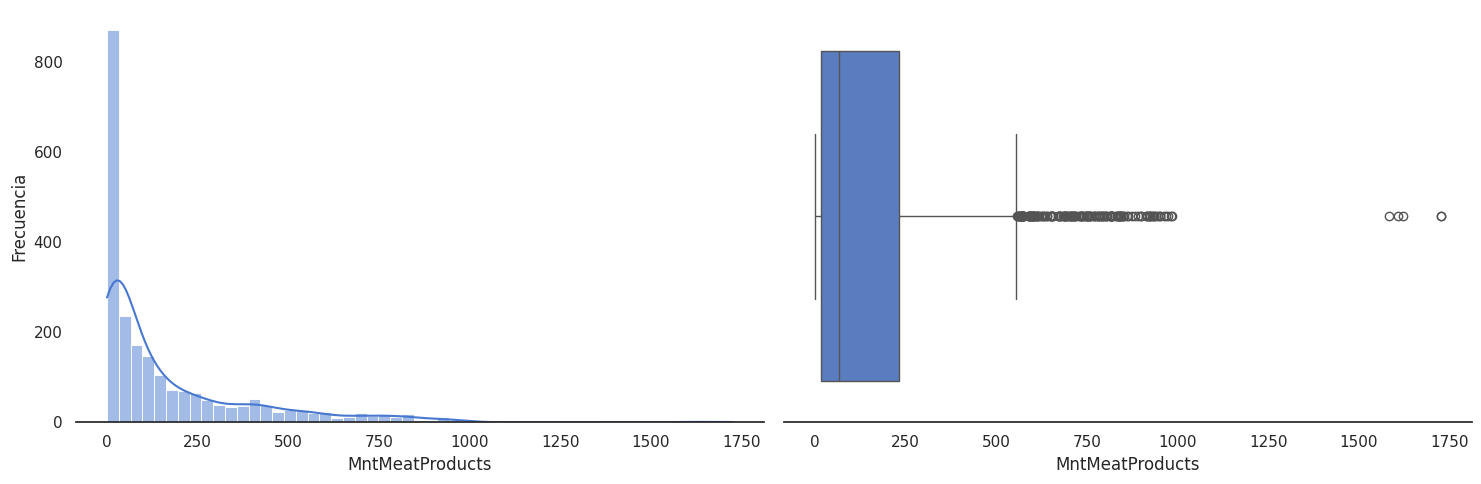

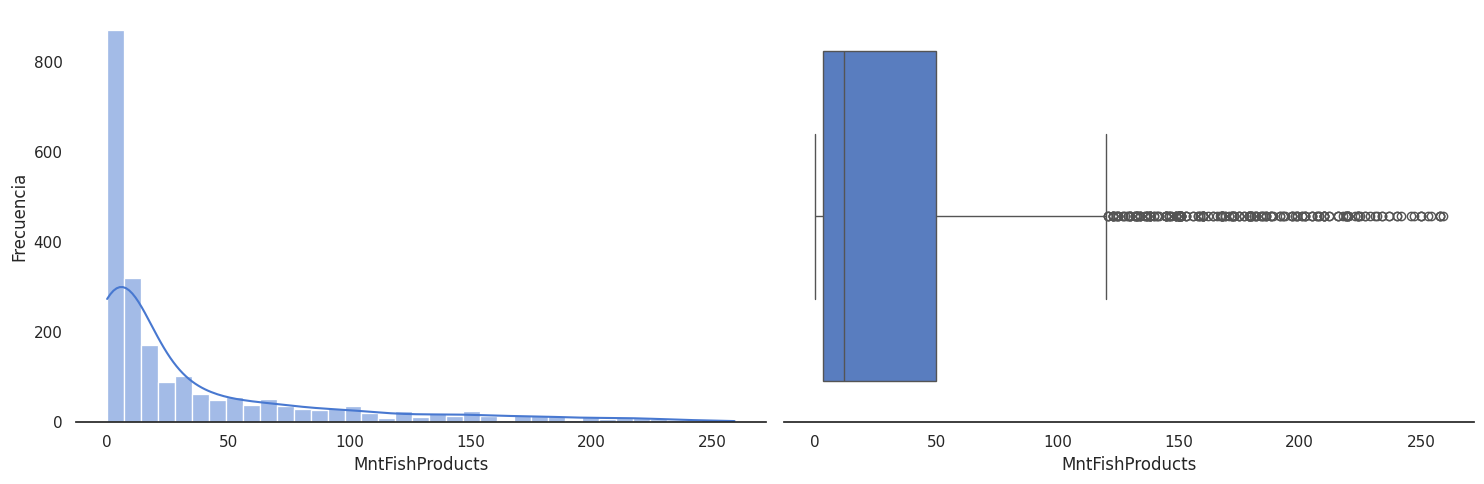

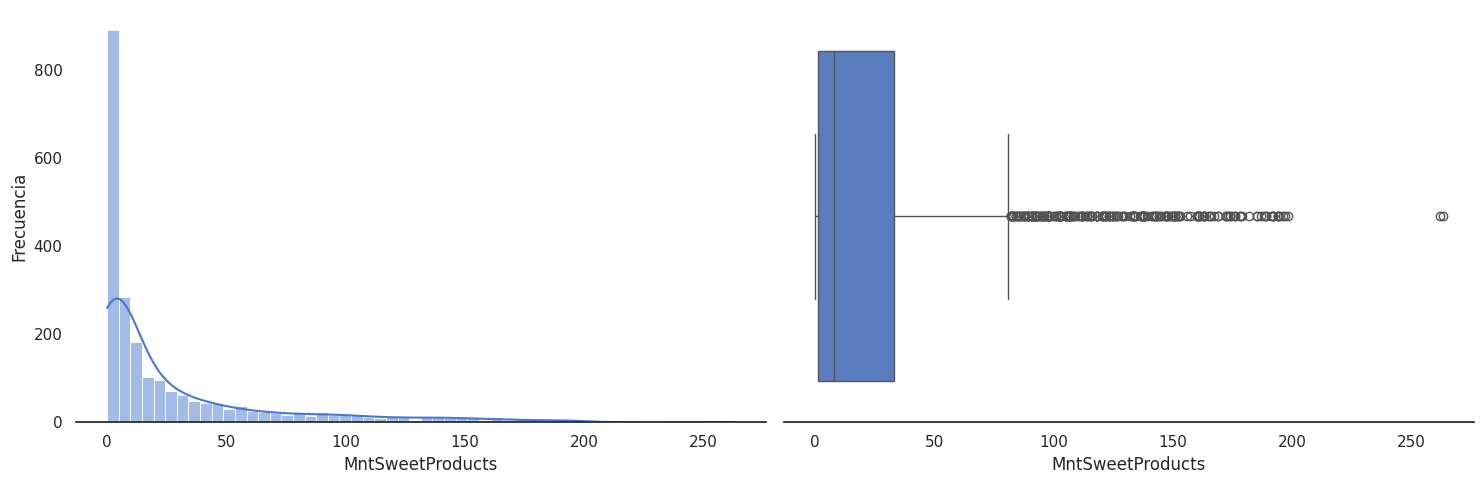

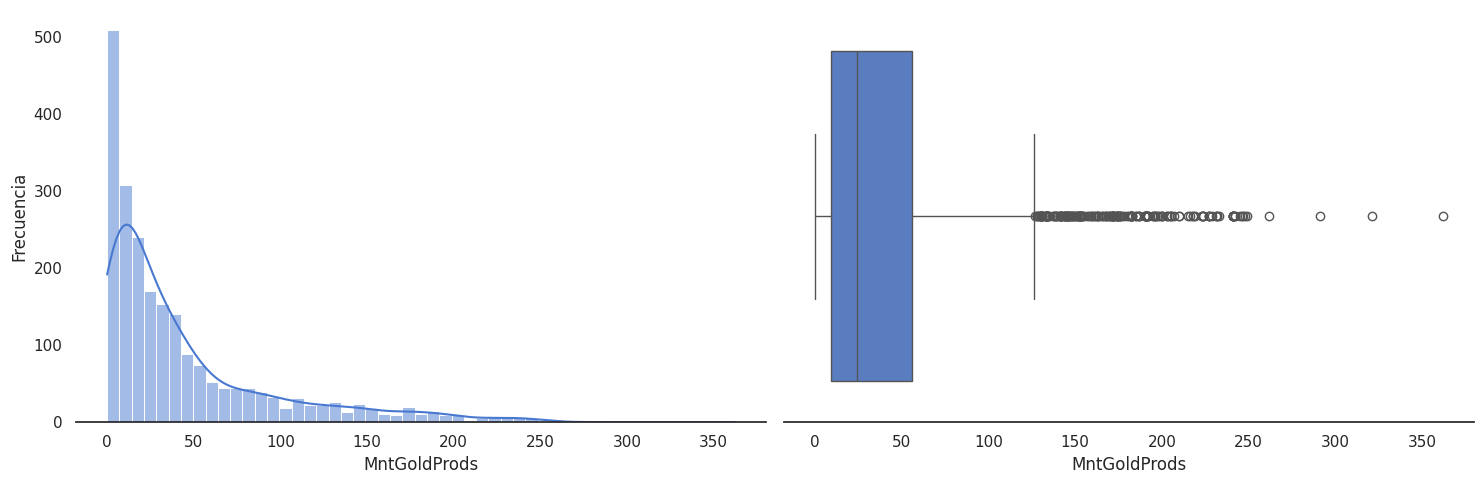

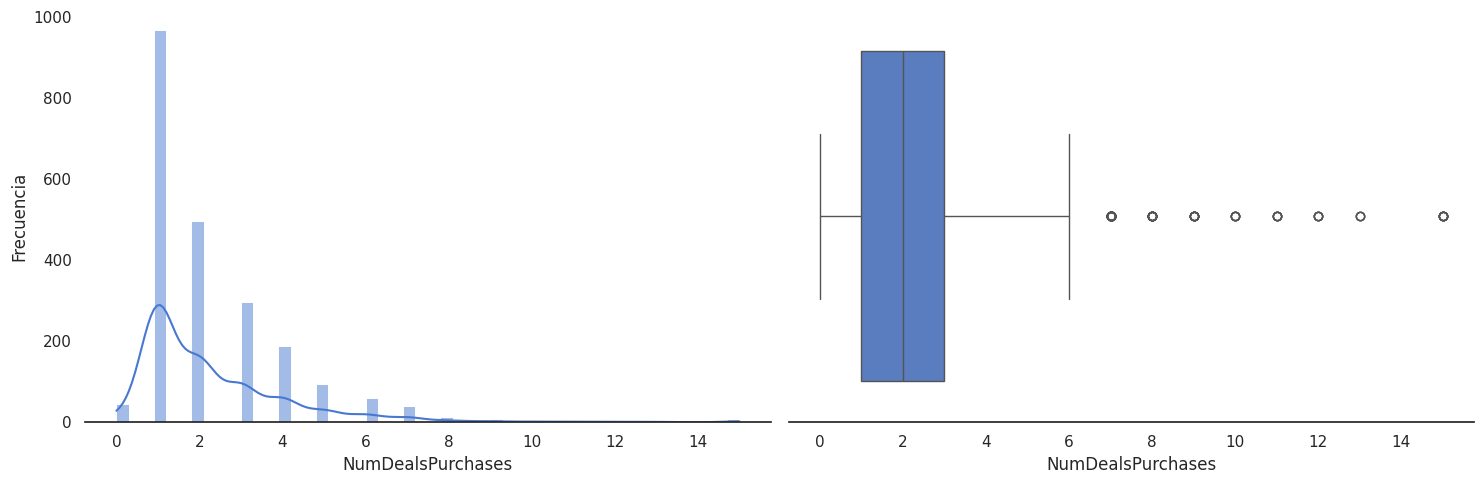

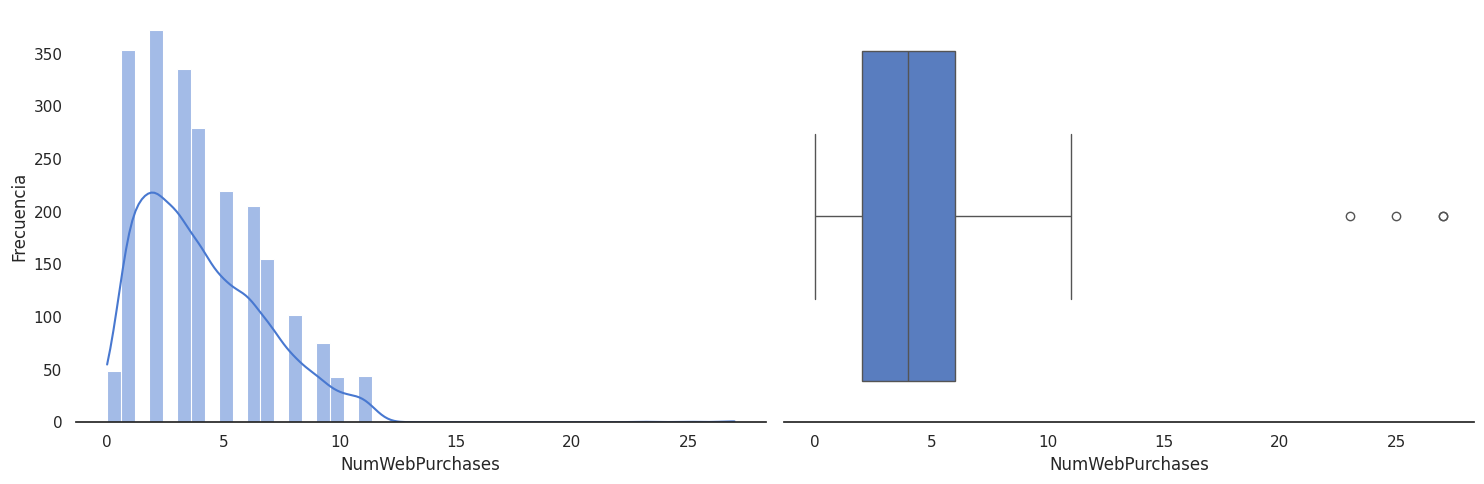

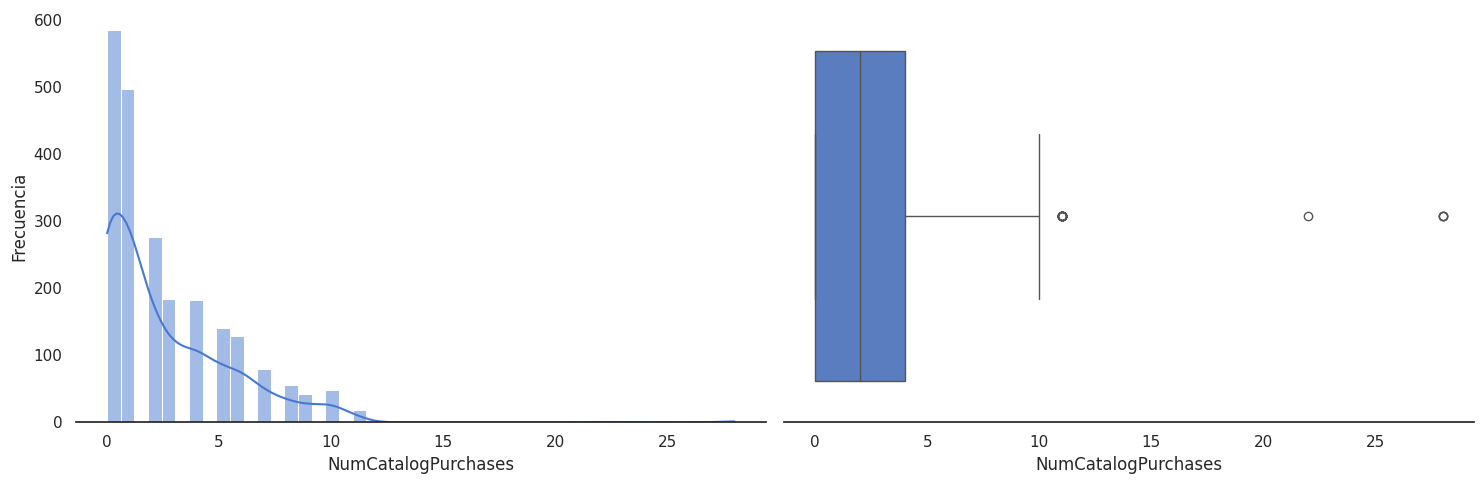

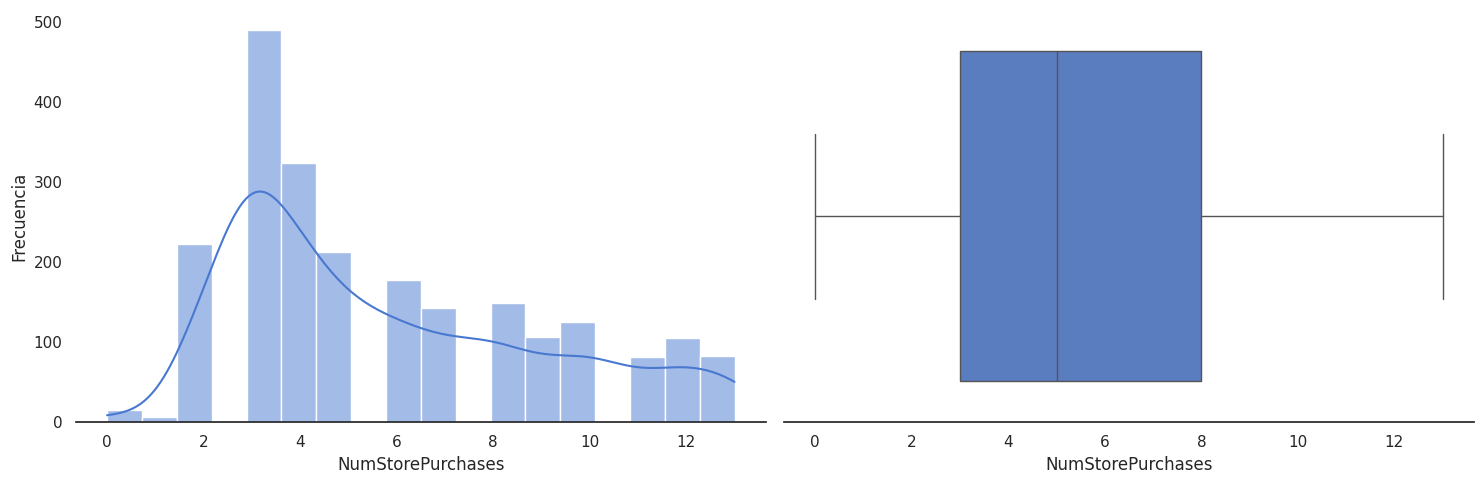

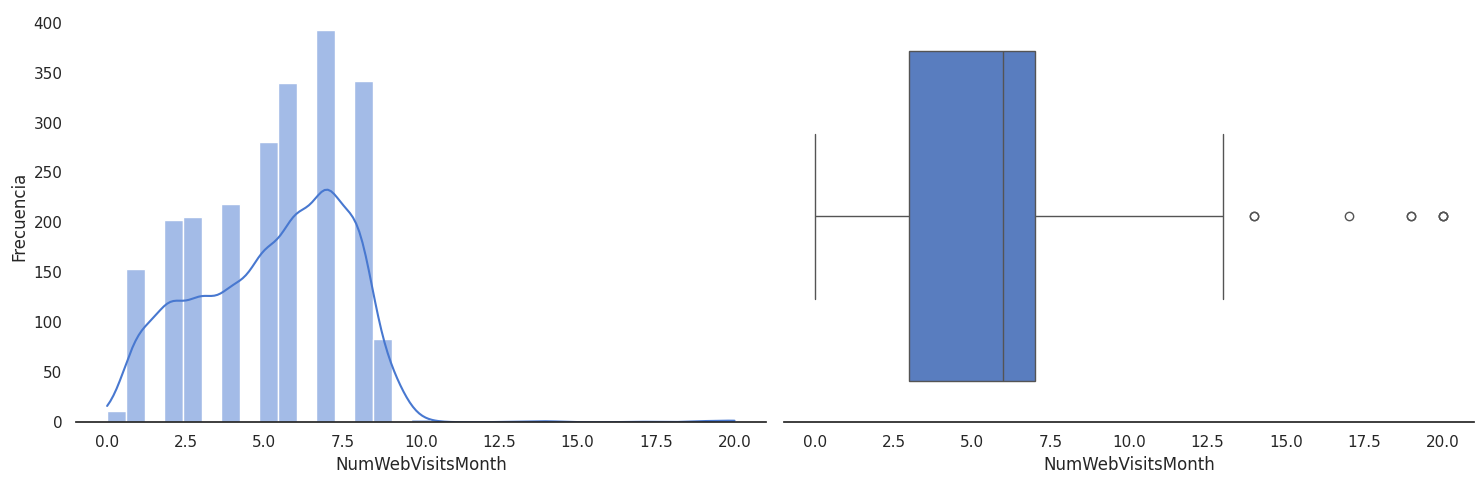

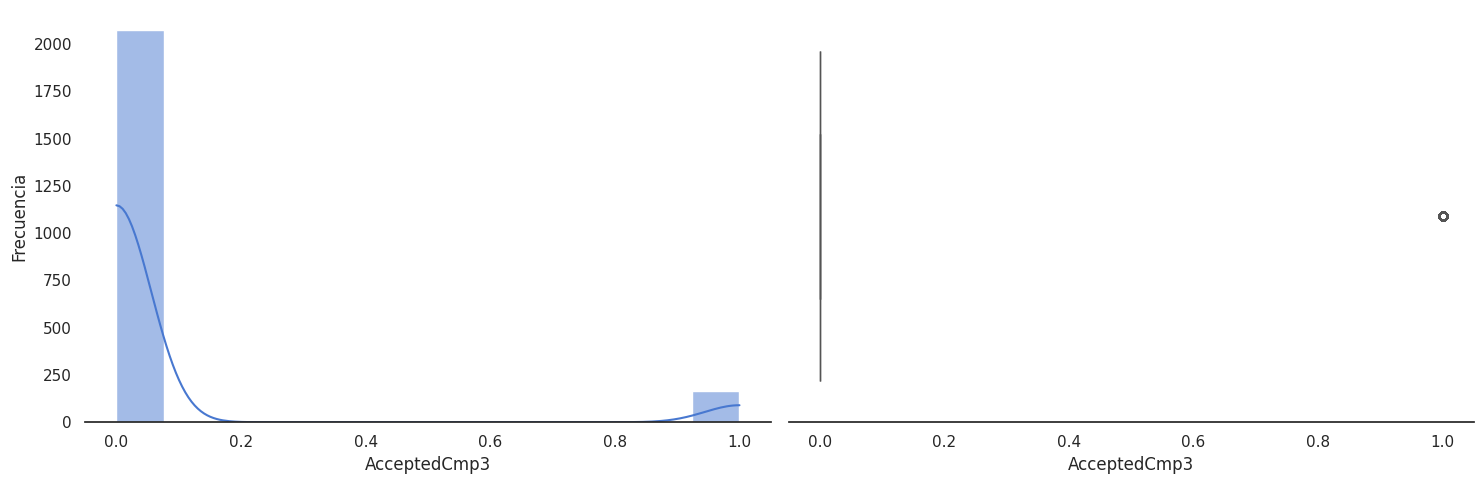

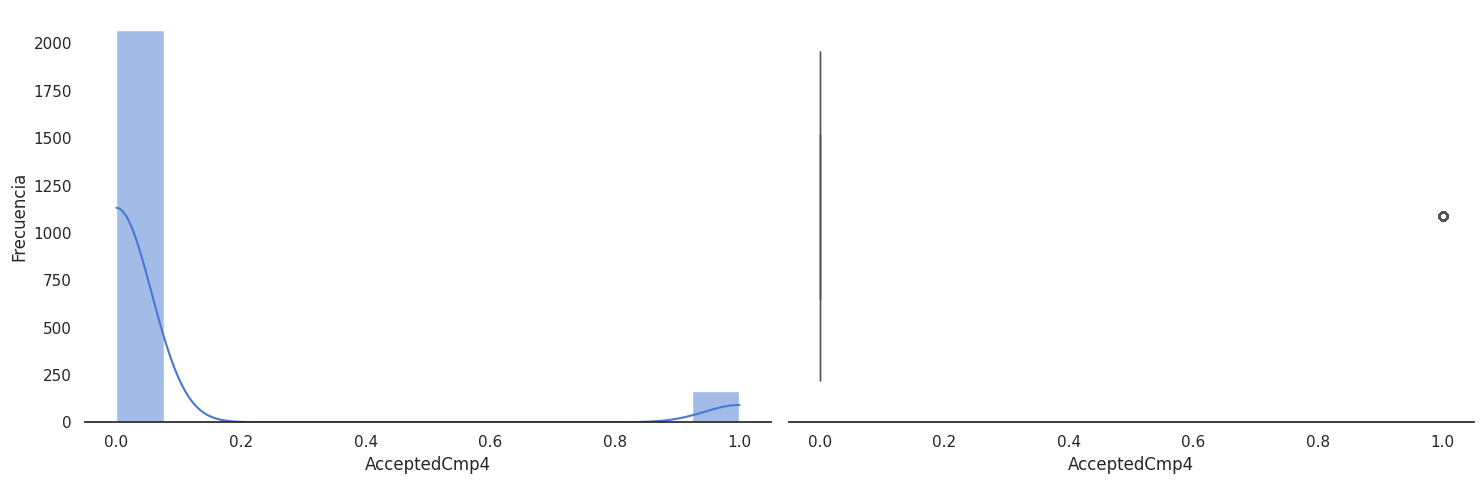

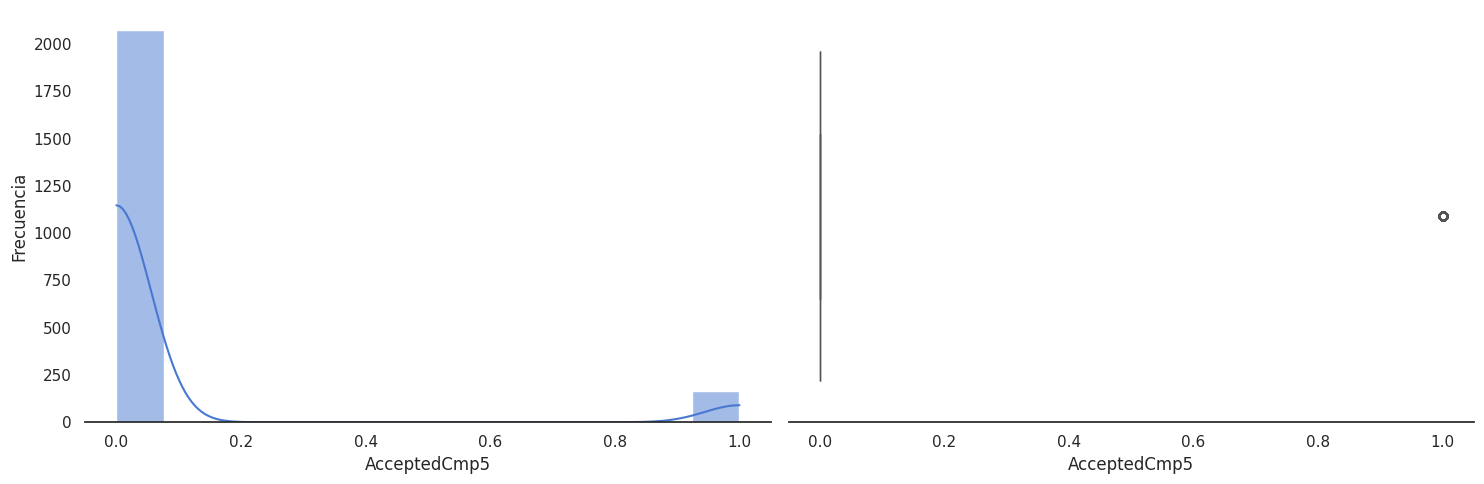

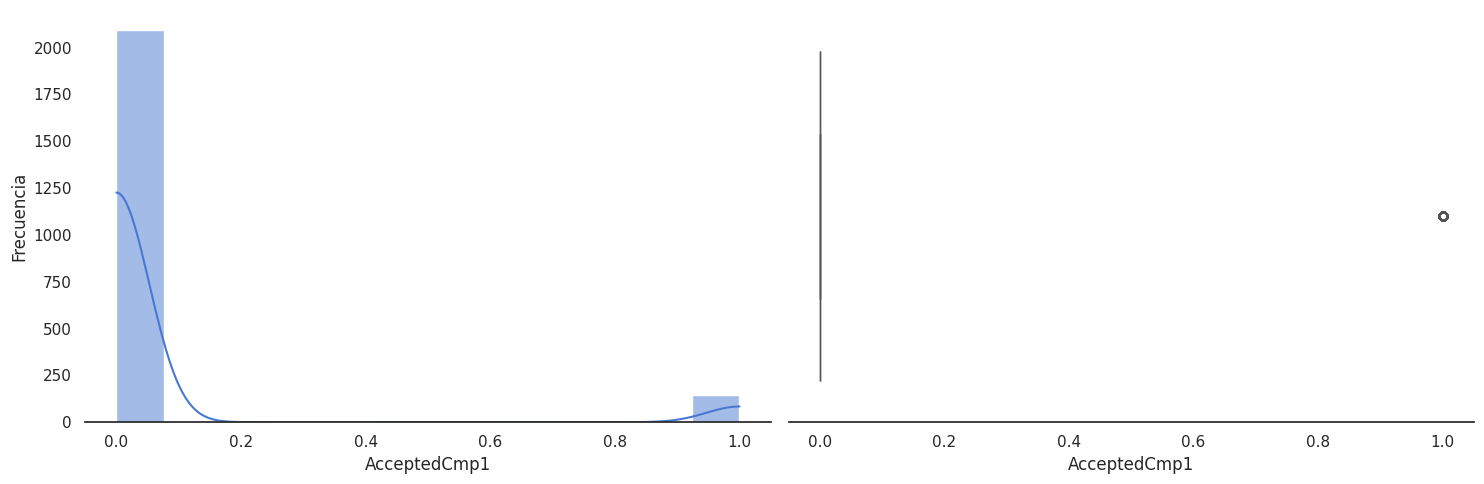

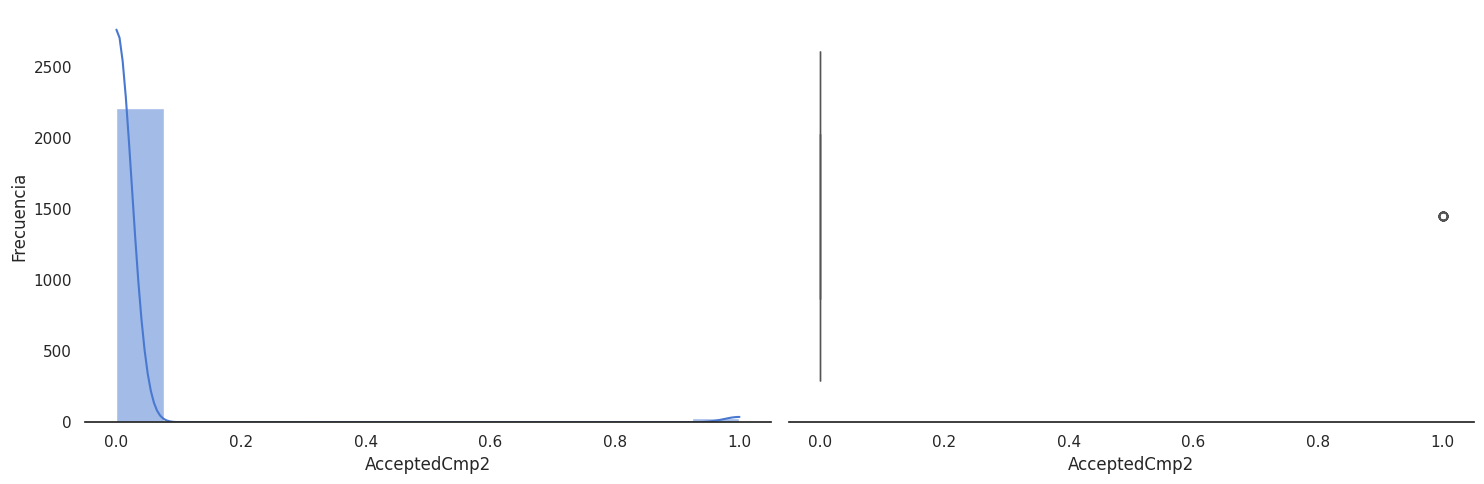

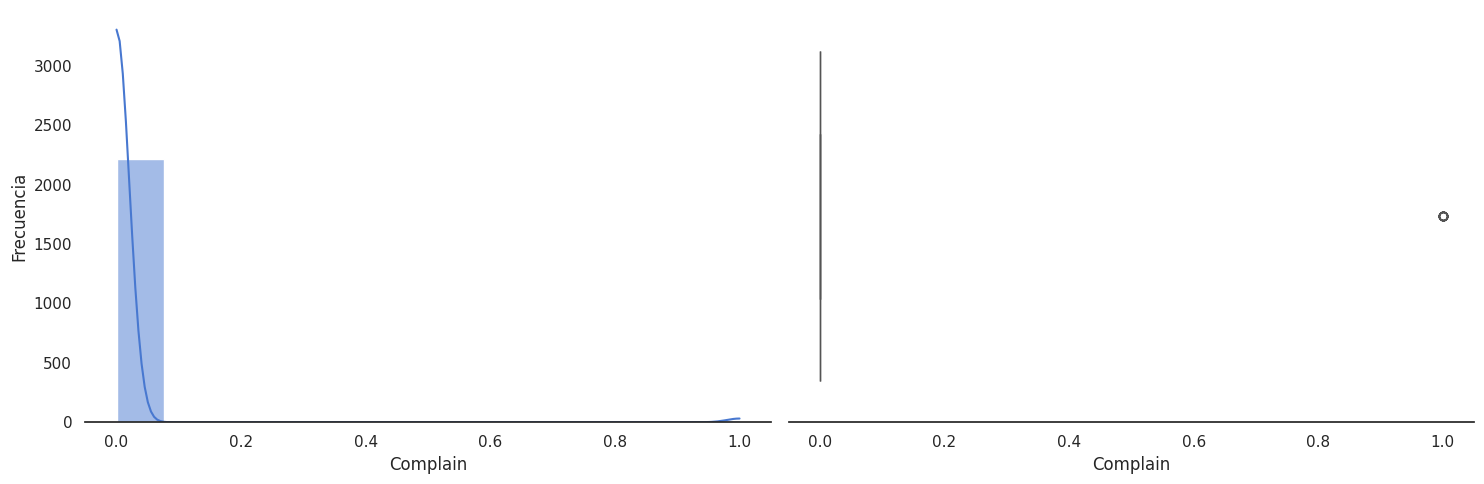

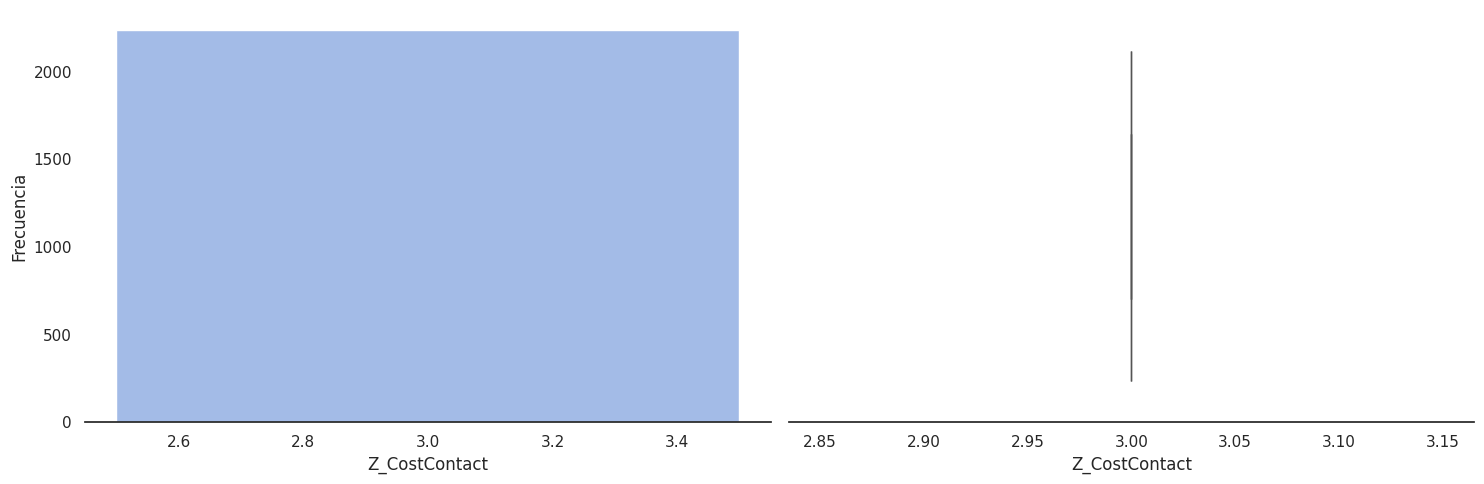

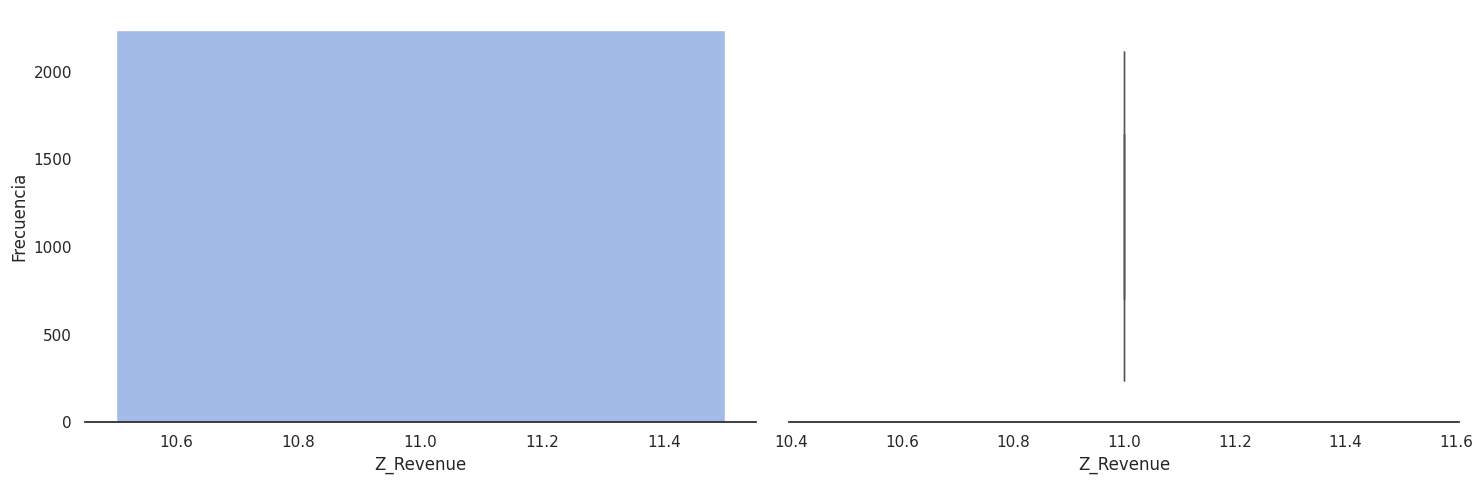

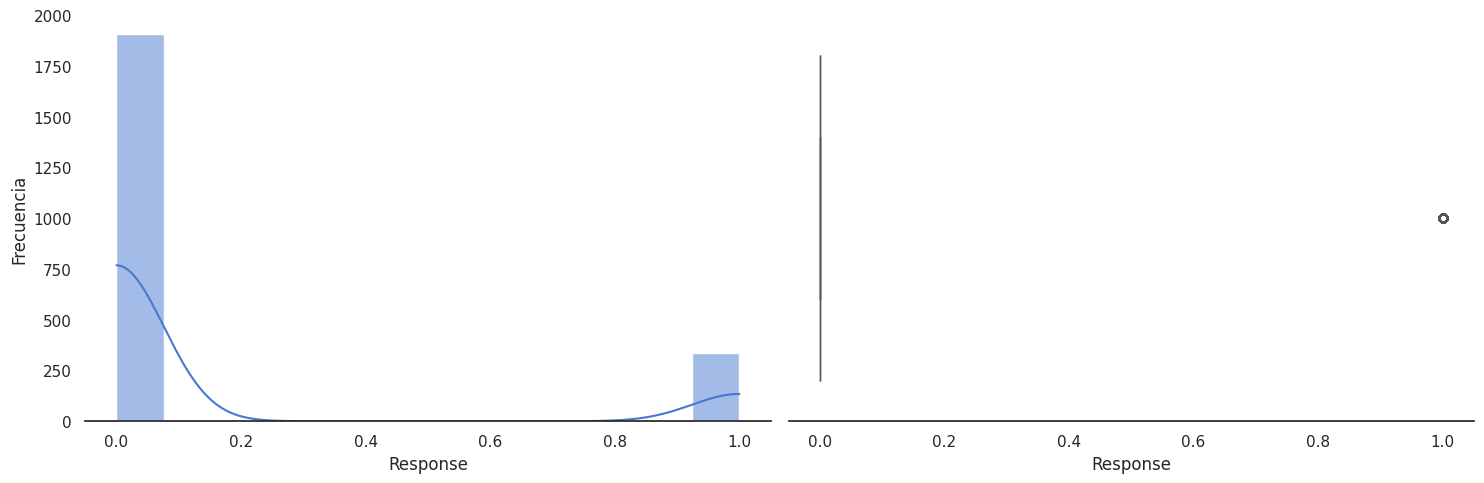

In [4]:
def vis_hist_boxplot(df):
    for i in df.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set(style="white", palette="muted", color_codes=True)
        sns.despine(left=True)

        # Histograma con kde
        sns.histplot(data=df, x=i, kde=True, ax=ax[0]).set_xlabel(f"{i}")
        ax[0].set_ylabel('Frecuencia')
        # Boxplot
        sns.boxplot(data=df, x=i, ax=ax[1])

        plt.tight_layout()
        plt.show()

vis_hist_boxplot(df)

In [5]:
df.describe().round()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.0,2240.0,2216.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,...,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.0,1969.0,52247.0,0.0,1.0,49.0,304.0,26.0,167.0,38.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
std,3247.0,12.0,25173.0,1.0,1.0,29.0,337.0,40.0,226.0,55.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1893.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
25%,2828.0,1959.0,35303.0,0.0,0.0,24.0,24.0,1.0,16.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
50%,5458.0,1970.0,51382.0,0.0,0.0,49.0,174.0,8.0,67.0,12.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
75%,8428.0,1977.0,68522.0,1.0,1.0,74.0,504.0,33.0,232.0,50.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
max,11191.0,1996.0,666666.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,...,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0


In [6]:
# Revisar valores únicos y cantidades de las columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("-" * 20)


Columna: Education
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
--------------------
Columna: Marital_Status
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
--------------------
Columna: Dt_Customer
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64
--------------------


In [7]:
# Mapeo ordinal para Education
education_map = {'Basic': 0, '2n Cycle': 1, 'Master': 2, 'PhD': 3}
df['Education_encoded'] = df['Education'].map(education_map)

# Llenar los NaN con un valor por defecto (por ejemplo, -1 para valores desconocidos)
df['Education_encoded'] = df['Education_encoded'].fillna(-1).astype(int)

In [8]:
# Eliminar filas donde Marital_Status es igual a 'Absurd' o 'YOLO'
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [9]:
#Agrupar en categorías más simples
df['Relationship_Status'] = df['Marital_Status'].replace({
    'Married': 'In_Relationship',
    'Together': 'In_Relationship',
    'Single': 'Single',
    'Divorced': 'Not_In_Relationship',
    'Widow': 'Not_In_Relationship',
    'Alone': 'Not_In_Relationship'
})

# Convertir a variables numéricas con one-hot encoding
df = pd.get_dummies(df, columns=['Relationship_Status'])

# Convertir los booleanos a enteros (0 y 1)
relationship_columns = [col for col in df.columns if 'Relationship_Status' in col]
df[relationship_columns] = df[relationship_columns].astype(int)

In [10]:
import datetime as dt

# Convertir a datetime primero
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Extraer año, mes, día
df['Customer_Year'] = df['Dt_Customer'].dt.year
df['Customer_Month'] = df['Dt_Customer'].dt.month
df['Customer_Day'] = df['Dt_Customer'].dt.day

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ID                                       2236 non-null   int64         
 1   Year_Birth                               2236 non-null   int64         
 2   Education                                2236 non-null   object        
 3   Marital_Status                           2236 non-null   object        
 4   Income                                   2212 non-null   float64       
 5   Kidhome                                  2236 non-null   int64         
 6   Teenhome                                 2236 non-null   int64         
 7   Dt_Customer                              2236 non-null   datetime64[ns]
 8   Recency                                  2236 non-null   int64         
 9   MntWines                                 2236 

In [12]:
# Eliminar filas donde Year_Birth es menor a 1940
df = df[df['Year_Birth'] >= 1940]

In [13]:
# Mostrar los 5 valores máximos de Income
print(df['Income'].nlargest(5))
print('\n')

# Encontrar el índice del valor máximo de Income
max_income_index = df['Income'].idxmax()

# Eliminar la fila con el valor máximo de Income
df = df.drop(max_income_index)

# Verificar que se eliminó el valor máximo
print(df['Income'].nlargest(5))

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64


617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
Name: Income, dtype: float64


In [14]:
# Aplicar transformaciones logarítmicas y cuadráticas
for col in df.columns:
    if col.startswith('Mnt') or col.startswith('Num'):
        # Transformación logarítmica
        df[col + '_log'] = np.log1p(df[col])  # Usamos log1p para evitar problemas con ceros

In [15]:
outliers_IQR(df)


🚩 Outliers detected in ID: 0

🚩 Outliers detected in Year_Birth: 0

🚩 Outliers detected in Income: 7

🚩 Outliers detected in Kidhome: 0

🚩 Outliers detected in Teenhome: 0

🚩 Outliers detected in Recency: 0

🚩 Outliers detected in MntWines: 35

🚩 Outliers detected in MntFruits: 225

🚩 Outliers detected in MntMeatProducts: 174

🚩 Outliers detected in MntFishProducts: 221

🚩 Outliers detected in MntSweetProducts: 248

🚩 Outliers detected in MntGoldProds: 204

🚩 Outliers detected in NumDealsPurchases: 86

🚩 Outliers detected in NumWebPurchases: 4

🚩 Outliers detected in NumCatalogPurchases: 23

🚩 Outliers detected in NumStorePurchases: 0

🚩 Outliers detected in NumWebVisitsMonth: 8

🚩 Outliers detected in AcceptedCmp3: 163

🚩 Outliers detected in AcceptedCmp4: 167

🚩 Outliers detected in AcceptedCmp5: 161

🚩 Outliers detected in AcceptedCmp1: 143

🚩 Outliers detected in AcceptedCmp2: 30

🚩 Outliers detected in Complain: 20

🚩 Outliers detected in Z_CostContact: 0

🚩 Outliers detected in 

In [16]:
# Eliminar las columnas originales después de aplicar las transformaciones logarítmicas
for col in df.columns:
    if col.endswith('_log') and col.replace('_log', '') in df.columns:
        df = df.drop(columns=col.replace('_log', ''))


In [17]:
# Crear un nuevo DataFrame solo con las columnas numéricas
df_numeric = df.select_dtypes(include=np.number)

print(df_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       2232 non-null   int64  
 1   Year_Birth                               2232 non-null   int64  
 2   Income                                   2208 non-null   float64
 3   Kidhome                                  2232 non-null   int64  
 4   Teenhome                                 2232 non-null   int64  
 5   Recency                                  2232 non-null   int64  
 6   AcceptedCmp3                             2232 non-null   int64  
 7   AcceptedCmp4                             2232 non-null   int64  
 8   AcceptedCmp5                             2232 non-null   int64  
 9   AcceptedCmp1                             2232 non-null   int64  
 10  AcceptedCmp2                             2232 non-nul

# 2. Análisis no supervisado:

Selecciona un enfoque de análisis no supervisado: K-means o PCA.

– K-means: Si seleccionas K-means, determina el número óptimo de clusters utilizando el método del codo o el silhouette score. Agrupa a los clientes en diferentes clusters y analiza cómo se dividen según sus características demográficas y de compra.

– PCA: Si eliges PCA, realiza una reducción de dimensionalidad para capturar al menos el 90% de la varianza explicada. Proyecta los datos en los primeros componentes principales y visualiza cómo se agrupan los clientes en el nuevo espacio de características.

In [18]:
# Asociación de Cramer
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    crosstab = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    min_dim = min(crosstab.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Seleccionar todas las columnas categóricas excepto la variable objetivo
target_col = 'Income'
categorical_cols = df_numeric.select_dtypes(include=['object','int','float']).columns
other_cols = [col for col in categorical_cols if col != target_col]

# Calcular V de Cramer para cada columna con respecto a AI_Satisfication
cramer_scores = {}
for col in other_cols:
    cramer_scores[col] = cramers_v(df_numeric[target_col], df_numeric[col])

# Convertir a Series y ordenar
cramer_results = pd.Series(cramer_scores).sort_values(ascending=False)

print(f"\nAsociaciones con {target_col} usando V de Cramer:")
print(cramer_results)

# V de Cramer: medida estadística evalúa fuerza de asociación entre variables categóricas, basada en estadística chi-cuadrado.
# Sus valores van de 0 a 1, donde: 0 significa que no hay asociación, 1 significa una asociación perfecta…
# < 0.1: asociación muy débil, 0.1 - 0.3: asociación débil, 0.3 - 0.5: asociación moderada, >0.5: asociación fuerte

# La ventaja del V de Cramer es que:
# Funciona con variables categóricas de cualquier número de categorías
# Es simétrica (el orden de las variables no importa)
# Es normalizada (siempre va de 0 a 1)
# No asume ninguna distribución específica de los datos

<ipython-input-18-a5faf32f10be>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))
<ipython-input-18-a5faf32f10be>:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min_dim))



Asociaciones con Income usando V de Cramer:
ID                                         1.000000
Complain                                   1.000000
AcceptedCmp4                               0.996701
Kidhome                                    0.995766
NumWebVisitsMonth_log                      0.995388
AcceptedCmp5                               0.994933
MntFishProducts_log                        0.994785
NumCatalogPurchases_log                    0.994317
AcceptedCmp1                               0.994302
NumWebPurchases_log                        0.994077
MntMeatProducts_log                        0.993799
MntSweetProducts_log                       0.993720
NumDealsPurchases_log                      0.993633
AcceptedCmp3                               0.993632
NumStorePurchases_log                      0.993435
MntFruits_log                              0.993296
MntWines_log                               0.993153
Customer_Month                             0.991679
Customer_Day       

In [19]:
df_numeric = df_numeric.drop(columns=['ID', 'Complain', 'Z_CostContact', 'Z_Revenue'], errors='ignore')

In [20]:
# Eliminar filas con NaN en df_numeric
df_numeric = df_numeric.dropna()

In [22]:
df_numeric.shape

(2208, 29)

In [32]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year_Birth                               2208 non-null   int64  
 1   Income                                   2208 non-null   float64
 2   Kidhome                                  2208 non-null   int64  
 3   Teenhome                                 2208 non-null   int64  
 4   Recency                                  2208 non-null   int64  
 5   AcceptedCmp3                             2208 non-null   int64  
 6   AcceptedCmp4                             2208 non-null   int64  
 7   AcceptedCmp5                             2208 non-null   int64  
 8   AcceptedCmp1                             2208 non-null   int64  
 9   AcceptedCmp2                             2208 non-null   int64  
 10  Response                                 2208 non-nul

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separar características y variable objetivo
X = df_numeric.drop(columns=['Income'])
y = df_numeric['Income']

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.90)  # Mantiene el 90% de la varianza
X_pca = pca.fit_transform(X_scaled)

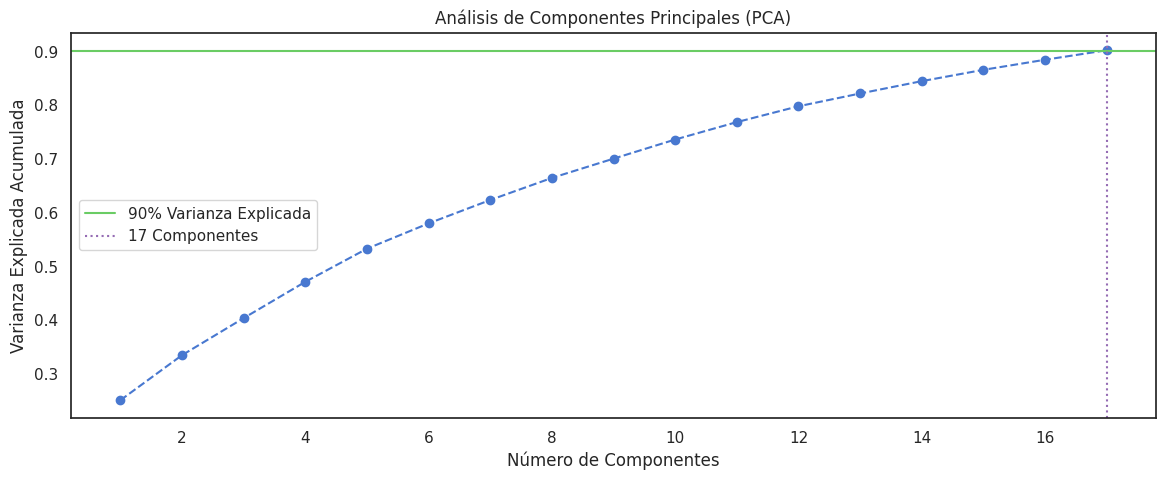

In [27]:
# Visualización de la varianza explicada
plt.figure(figsize=(14,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Componentes Principales (PCA)')

# Agregar líneas horizontales en y = 0.9
plt.axhline(y=0.9, color='g', linestyle='-', label='90% Varianza Explicada')

# Líneas verticales
plt.axvline(x=17, color='m', linestyle=':', label='17 Componentes')

# Mostrar la leyenda
plt.legend()

plt.show()

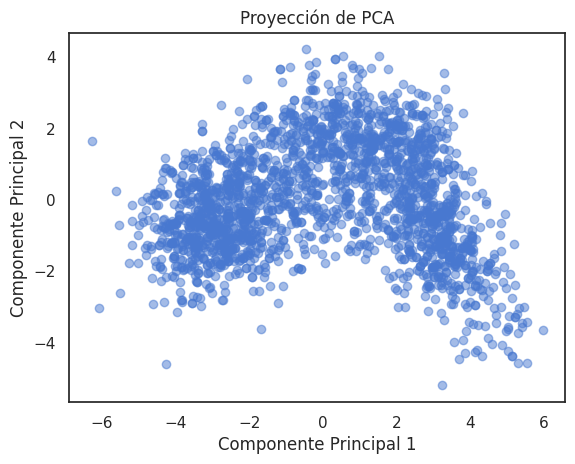

In [28]:
# Visualización de los componentes principales
df_pca = pd.DataFrame(data=X_pca) # Convert X_pca to a pandas DataFrame
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección de PCA')
plt.show()

# 3. Modelado con MLP:

  – Implementa un Perceptrón Multicapa (MLP) para predecir las compras futuras de los clientes o su probabilidad de realizar una compra en una categoría específica de productos.

  – Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de tener una proporción adecuada de cada clase en el conjunto de datos.
  
  – Discute la arquitectura de tu MLP, incluyendo el número de capas ocultas, el número de neuronas en cada capa, y las funciones de activación utilizadas.

In [29]:
from sklearn.neural_network import MLPRegressor

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Crear el modelo MLP
mlp_reg = MLPRegressor(hidden_layer_sizes=(48, 24), alpha=0.02, max_iter=1000, early_stopping=True, random_state=42)
mlp_reg.fit(X_train, y_train)

MLPRegressor(alpha=0.02, early_stopping=True, hidden_layer_sizes=(48, 24),
             max_iter=1000, random_state=42)

# 4. Evaluación del modelo:

  – Evalúa el modelo MLP utilizando métricas de clasificación como la precisión, el recall, el F1-score y la matriz de confusión. Asegúrate de comparar estas métricas entre el conjunto de entrenamiento y el conjunto de prueba para identificar cualquier posible sobreajuste.
  
  – Visualiza las curvas de aprendizaje que muestren la pérdida y la precisión a lo largo del entrenamiento.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicciones
y_train_pred = mlp_reg.predict(X_train)
y_test_pred = mlp_reg.predict(X_test)

# Cálculo de métricas
def evaluar_modelo(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_real, y_pred)
    return mae, mse, rmse, r2

# Evaluación en entrenamiento y prueba
mae_train, mse_train, rmse_train, r2_train = evaluar_modelo(y_train, y_train_pred)
mae_test, mse_test, rmse_test, r2_test = evaluar_modelo(y_test, y_test_pred)

# Imprimir resultados
print(f"Entrenamiento -> MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Prueba -> MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Entrenamiento -> MAE: 7177.1717, MSE: 93699701.5502, RMSE: 9679.8606, R²: 0.7965
Prueba -> MAE: 7776.9279, MSE: 135522951.4246, RMSE: 11641.4325, R²: 0.7140


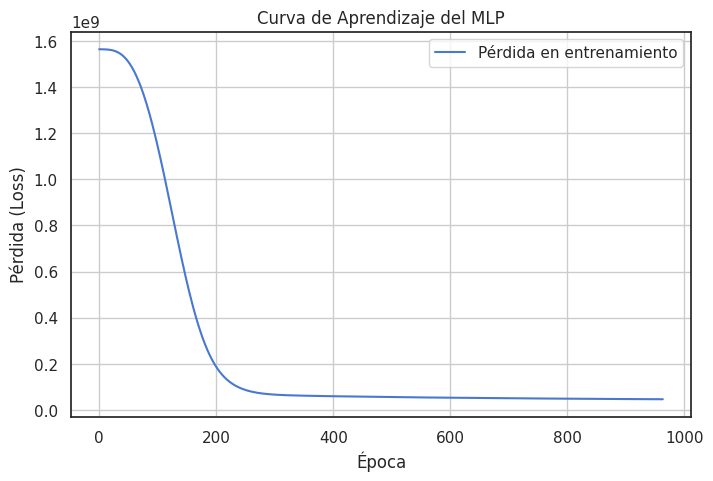

In [31]:
# Entrenar modelo con la opción warm_start para capturar el historial
mlp_reg = MLPRegressor(hidden_layer_sizes=(48, 24), alpha=0.02, max_iter=1000,
                       early_stopping=True, random_state=42)

mlp_reg.fit(X_train, y_train)

# Extraer las pérdidas registradas durante el entrenamiento
train_loss = mlp_reg.loss_curve_

# Graficar la evolución de la pérdida
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Pérdida en entrenamiento', color='b')
plt.xlabel('Época')
plt.ylabel('Pérdida (Loss)')
plt.title('Curva de Aprendizaje del MLP')
plt.legend()
plt.grid()
plt.show()


# 5. Discusión y análisis:

  – Reflexiona sobre los resultados del análisis no supervisado y el modelo MLP. ¿Qué insights obtuviste de los clusters o los componentes principales? ¿Cómo se relacionan con el comportamiento de los clientes?
  
  – Discute el rendimiento del modelo MLP. ¿Es adecuado para este tipo de datos? ¿Cómo podrías mejorarlo?

- PCA (Análisis de Componentes Principales):

Se retuvo el 90% de la varianza con 17 componentes.

Se graficó la varianza explicada acumulada para elegir el número de componentes óptimo.

- MLPRegressor (Red Neuronal para Regresión):

Se entrenó un modelo con capas ocultas de 48 y 24 neuronas.

Se usó early stopping y max_iter=1000.

Se obtuvieron métricas para entrenamiento y prueba.



Métricas obtenidas:

- Entrenamiento

MAE: 7,177.17

MSE: 93,699,701.55

RMSE: 9,679.86

R²: 0.7965

- Prueba

MAE: 7,776.92

MSE: 135,522,951.42

RMSE: 11,641.43

R²: 0.7140

- Análisis de desempeño

El modelo generaliza bien, pero la diferencia entre entrenamiento y prueba sugiere ligera sobreajuste.

R² = 0.71 en prueba indica que el modelo captura una parte significativa de la variabilidad en Income, aunque aún hay margen de mejora.

La curva de pérdida parece haber convergido correctamente, lo que sugiere que el entrenamiento no sufrió de underfitting.




# 6. Entrega final:

  – Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación del modelo y conclusiones. Asegúrate de que el informe sea claro y estructurado, con visualizaciones que apoyen tu análisis.

Posibles Mejoras

- Optimización de Hiperparámetros

Ajustar el número de neuronas y capas ocultas (prueba con 64-32-16 o 32-16-8). Si bien fue algo que se ensayó, el código que se ve, fue el que obtuvo los mejores resultados en MAE y R2

Variar el parámetro alpha para regularización L2 (prueba valores más bajos como 0.005 o 0.01).

Experimentar con diferentes tasas de aprendizaje. O incluso cambiar PPCA por K-means

- Ajustes en PCA

Se podría ver si una menor cantidad de componentes mantiene el rendimiento (80% varianza por ejemplo).

Analizar la importancia de cada componente principal en relación con Income.

- Comparación con otros modelos

Probar con Random Forest Regressor o XGBoost para ver si pueden capturar mejor la no linealidad.

- Feature Engineering

Crear variables derivadas (e.g., relación entre NumWebPurchases_log y NumWebVisitsMonth_log, o un total de compras no solo seccionado o por departamento o tipo de producto).

Análisis de outliers en Income (podría mejorar la predicción). Si bien se eliminó el único "extremo" que parecía erroneo, podría considerarse tambhién el ajusatar más
